# Week 2: On to Two-Dimensional Systems
### Aim: Work through lectures 4–6 and continue module on OOP concepts.

## Lecture 4 – Model of an Insect Outbreak (sc. 3.7, p. 74–80)

#### A bifurcation problem involving two parameters and discontinuous jumps – Ludwig et al. (1978).

Spruce budworms in the forests of eastern Canada can defoliate a forest in ~4 years.

#### Simplified Model:

$N(t) = $ population of budworms

$\dot N = RN\left(1 - \frac{N}{K}\right) - p(N)$ where $p(N)$ is the death rate due to *predation* (birds), i.e. the population grows logistically in the absence of predators.

Ludwig et al. assumed the form $p(N) = \frac{BN^2}{A^2 + N^2}$ where $A, B > 0$.

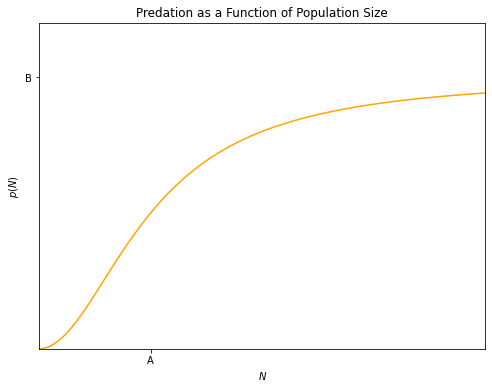

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d

#Declare the two parameters B and A
b, a = 5, 50

#Create an array of pupulation sizes
n_values = np.linspace(0, 200, 100)

#Define the predation function
def predation(b, a, n):
    return (b * n**2) / (a**2 + n**2)

#Format figure dimensions
plt.figure(figsize=(8, 6))
plt.xlim([0, 200])
plt.ylim([0, 6])

#Plot the predation function against the population size
plt.plot(n_values, predation(b, a, n_values), 'orange')

#Format figure title and labels
plt.title('Predation as a Function of Population Size')
plt.xlabel(r'$N$')
plt.ylabel(r'$p(N)$')
plt.xticks([a], ['A'])
plt.yticks([b], ['B'])

plt.show()

In the above, predation is scarce when the budworm population is small but increases rapidly at the critical level $N = A$ and saturates to $B$.

We now have four parameters: $A, B, R, K$ which all have units.

#### Dimensionless Formulation

We choose the scale of $N$ s.t. the nonlinear term $p(N)$ has no parameters.

Let $x = \frac{N}{A} \Rightarrow N = Ax$ and $\dot N = A \dot x$.

The model then becomes $A \frac{dx}{dt} = RAx\left(1 - \frac{Ax}{K}\right) - \frac{BA^2x^2}{A^2(1 + x^2)} \Rightarrow \frac{A}{B} \frac{dx}{dt} = \frac{RAx}{B}\left(1 - \frac{Ax}{K}\right) - \frac{x^2}{1 + x^2}$

Introduce *dimensionless time* $\tau = \frac{Bt}{A}$ and the terms $\frac{1}{k} = \frac{A}{K}$ and $r = \frac{RA}{B}$.

Then the dimensionless form becomes $x' = \frac{dx}{d\tau} = rx\left(1 - \frac{x}{k}\right) - \frac{x^2}{1 + x^2}$ (Note: w.r.t $\tau$).
> Note that the predation parameter is now implicit.

#### Analysis of Fixed Points

This equation has an *unstable* fixed point $x^* = 0$. The other fixed points are the solutions to $r\left(1 - \frac{x}{k}\right) = \frac{x}{1 + x^2}$.
> Alternatively, the equation can be manipulated into the form $rx - \left(\frac{r + k}{k}\right)x^2 + rx^3 - \frac{r}{k}x^4 = 0$ (used for root finding in Python).

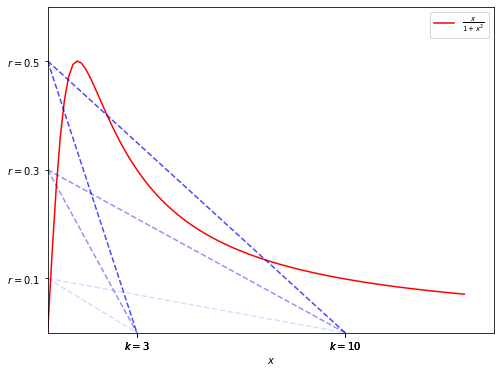

In [8]:
#Define the left- and right-hand side functions
def lhs(r, k, x):
    return r * (1 - x/k)

def rhs(x):
    return x / (1 + x**2)

#Declare list of x values for plotting
x_values = np.linspace(0, 14, 100)

#Format figure
plt.figure(figsize=(8, 6))
plt.xlim([0, 15])
plt.ylim([0, 0.6])

#Plot the RHS function
plt.plot(x_values, rhs(x_values), 'r', label = r'$\frac{x}{1 + x^2}$')

x_ticks, x_markers = [], []
y_ticks, y_markers = [], []


#Plot three different instances of the LHS function
for r in [0.1, 0.3, 0.5]:
    for k in [3, 10]:
        plt.plot(x_values, lhs(r, k, x_values), '--', color = 'b', alpha = r/0.7)
        x_ticks.append(k)
        x_markers.append(r'$k = $' + str(k))
    y_ticks.append(r)
    y_markers.append(r'$r = $' + str(r))

plt.xlabel(r'$x$')
plt.xticks(x_ticks, x_markers)
plt.yticks(y_ticks, y_markers)

plt.legend()

plt.show()

At small values of $k$ there is only one fixed point for any value of $r$, whereas at greater values of $k$ multiple fixed points become possible.

In the above, at $r = 0.5$ and $k = 10$ there are three fixed points which we shall call $a, b$ and $c$.
> Somewhere in the interval $r \in [0.3, 0.5], k \in [3, 10]$ there occurs a *saddle-node bifurcation*.

As $r$ keeps increasing, $a$ and $b$ coalesce into one. At even higher values of $r$, the only remaining fixed point is $c$.
> The number of fixed points changes as $1 \rightarrow 2 \rightarrow 3 \rightarrow 2 \rightarrow 1$ (see: p. 79).

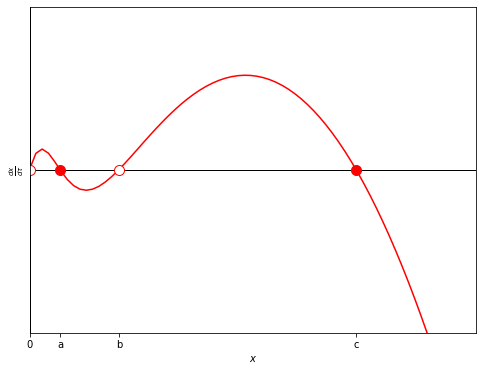

In [9]:
#Declare the two parameters
r, k = 0.5, 10

#Define derivative of x w.r.t. tau
def x_prime(r, k, x):
    return r*x*(1 - x/k) - x**2 / (1 + x**2)

#Format figure dimensions and axes
plt.figure(figsize=(8, 6))
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)
plt.xlim([0, 10])
plt.ylim([-0.5, 0.5])

plt.plot(x_values, x_prime(r, k, x_values), 'r')

#Find the roots of the manipulated equation
roots = np.real(np.roots([-r/k, r, -(r+k)/k, r, 0]))
roots.sort()
#print(roots)

#Plot fixed points of alternating stability
for n in range(len(roots)):
    if n % 2 == 0:
        plt.plot(roots[n], 0, ms = 10, marker = 'o', color = 'white', mec='r')
    else:
        plt.plot(roots[n], 0, ms = 10, marker = 'o', color = 'r')

plt.xticks(roots, [0, 'a', 'b', 'c'])
plt.yticks([], [])

plt.xlabel(r'$x$')
plt.ylabel(r'$\frac{dx}{d\tau}$')

plt.show()

In the above, the fixed point $x^* = 0$ is unstable. Since the stability of the fixed points alternates, $b$ must also be unstable, whereas $a$ and $c$ are stable.
> $a = $ refuge, $b = $ threshold, and $c = $ outbreak.

Suppose $x \approx a$ and the parameter $r$ starts to drift while $k$ remains constant. As the forest ages, $r$ increases slowly.

$r = \frac{RA}{B}$ where $A \propto $ surface area of foliage. Then $A = A'S$ where $A'$ is the critical density of budworms per leaf and $S$ is the number of leaves.
> $S$ increases slowly as the forest ages.

As $r$ increases, the fixed points $a, b$ move closer together until coalescence and eventual disappearance. At this point $x \to c \Rightarrow $ *discontinuous jump*.
> $r$ can now be decreased but $x$ remains at the local equilibrium $c \Rightarrow $ the change is *non-reversible* (see: *hysteresis*).

This non-reversibility can be visualised as a *cusp catastrophe* surface.
> As the surface folds in on itself, i.e. is not described by a simple function, it cannot be graphed using pyplot.

In [10]:
'''
plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

def roots(k, r):
    return np.real(np.roots([-r/k, r, -(r+k)/k, r, 0]))


k = np.linspace(5, 10, 100)
r = np.linspace(0.1, 1, 100)
#x = np.linspace(1, 5, 100)

K, R = np.meshgrid(k, r)
X = roots(K, R)

ax.scatter3D(K, R, X)

ax.set_xlabel('k')
ax.set_ylabel('r')
ax.set_zlabel('x')

plt.show()
'''

"\nplt.figure(figsize=(10, 8))\nax = plt.axes(projection='3d')\n\ndef roots(k, r):\n    return np.real(np.roots([-r/k, r, -(r+k)/k, r, 0]))\n\n\nk = np.linspace(5, 10, 100)\nr = np.linspace(0.1, 1, 100)\n#x = np.linspace(1, 5, 100)\n\nK, R = np.meshgrid(k, r)\nX = roots(K, R)\n\nax.scatter3D(K, R, X)\n\nax.set_xlabel('k')\nax.set_ylabel('r')\nax.set_zlabel('x')\n\nplt.show()\n"

### Exercise 3.7.6 – Model of an Epidemic (p. 91–92)

Kermack and McKendrick (1927) divide the population into three categories:

$x(t) = $ number of healthy people; $y(t) = $ number of sick people; $z(t) = $ number of dead people

The epidemic is assumed to spread so rapidly that the total population size remains constant. Then:

$\dot x = -kxy$

$\dot y = kxy - ly$

$\dot z = ly$

where $k$ is a constant of proportionality (infection rate) and $l$ is the constant death rate of sick people ($k, l > 0$).

#### a)

$\dot x + \dot y + \dot z = -kxy + kxy - ly + ly = 0$ so integrating both sides w.r.t. $t$ yields $x + y + z = N$ where $N$ is a constant.

#### b)

$\dot z = ly \Rightarrow y = \frac{\dot z}{l}$ which, upon substitution to the first equation, yields $\dot x = -\frac{k}{l}x\dot z$.

Cancelling out the $dt$ terms, we are left with $\frac{dx}{x} = -\frac{k}{l}dz$ which we can integrate with the initial conditions $x_0 = x(0)$ and $z_0 = 0$:

$\int_{x_0}^{x(t)}\frac{dx}{x} = -\frac{k}{l}\int_{0}^{z(t)}dz \Rightarrow \ln{\frac{x(t)}{x_0}} = -\frac{k}{l}z(t) \Rightarrow x(t) = x_0 \exp{\left(-\frac{k}{l}z(t)\right)}$.

#### c)

Substituting the results from parts a and b into the equation $\dot z = l[N - z -x_0\exp{\left(-\frac{k}{l}z\right)}]$:

$\dot z = l[N - z - x(t)]$ where $N - z - x = y$, so $\dot z = ly$ which is true.

#### d)

Defining the characteristic time scale $\tau = \frac{t}{T}$ and a quantity $u = \frac{k}{l}z$.

Then $\dot z = \frac{dz}{dt} = \frac{d\tau}{dt}\frac{dz}{d\tau} = \frac{1}{T}\frac{d}{d\tau}\left(\frac{l}{k}u\right) = \frac{1}{T}\frac{l}{k}\frac{du}{d\tau}$.

Dividing the equation in part c by $x_0 l$ then yields $\frac{1}{T}\frac{1}{kx_0}\frac{du}{d\tau} = \frac{N}{x_0} - \frac{l}{kx_0}u - e^{-u}$.

With $T = kx_0$, the equation gets the dimensionless form $\frac{du}{d\tau} = a - bu - e^{-u}$ where $a = \frac{N}{x_0}$ and $b = \frac{l}{kx_0}$.

#### e)

The total population $N$ must clearly be greater than or equal to the initial number of healthy people $x_0$, so $N \geq x_0$ and $a \geq 1$.

$k, l > 0$ and $x_0 > 0$, so it must also be that $b > 0$.

#### f)

We can graph the equation from part d using pyplot.

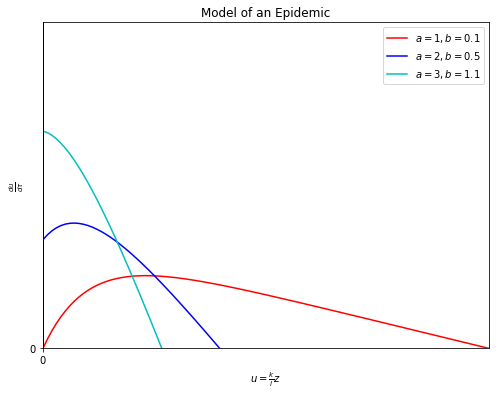

In [11]:
#Define the derivative of u w.r.t. tau
def u_deriv(a, b, u):
    return a - b*u - np.exp(-u)

#Define a list of u values for plotting
u_values = np.linspace(0, 10, 100)

#Format figure
plt.figure(figsize = (8, 6))
plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)
plt.xlim([0, 10])
plt.ylim([0, 3])
plt.xticks([0], ['0'])
plt.yticks([0], ['0'])

#Add labels
plt.title('Model of an Epidemic')
plt.xlabel(r'$u = \frac{k}{l}z$')
plt.ylabel(r'$\frac{du}{d\tau}$')

#Plot three qualitatively different instances of the function
plt.plot(u_values, u_deriv(1, 0.1, u_values), 'r', label=r'$a = 1, b = 0.1$')
plt.plot(u_values, u_deriv(2, 0.5, u_values), 'b', label=r'$a = 2, b = 0.5$')
plt.plot(u_values, u_deriv(3, 1.1, u_values), 'c', label=r'$a = 3, b = 1.1$')

plt.legend()

plt.show()

In the above, the system has two non-negative fixed points for $b < 0$ (one stable, one unstable) but only one for $b \geq 1$.

#### g)

The maximum of $\dot u(t)$ occurs when $\ddot u = 0$.

$u = \frac{k}{l}z \Rightarrow \dot u = \frac{k}{l}\dot z \Rightarrow \ddot u = \frac{k}{l}\ddot z$ where $\dot z = ly \Rightarrow \ddot z = l \dot y$.

Thus the maximum of $\dot u(t)$ occurs when $\ddot z = 0$ and $\dot y = 0$, so $\dot u(t), \dot z(t)$ and $y(t)$ peak at the same time $t_{peak}$.

#### h)

As evident from the graph in part f, for $b < 1$ the quantity $\dot u(t)$ increases at $t = 0$ before reaching a maximum at $t_{peak} > 0$ and eventually decreasing to $\dot u = 0$.

This is what we call an *epidemic*.

#### i)

As visible in the graph, for $b > 1$ the epidemic peaks at $t = 0$, so no epidemic occurs.

#### j)

The *threshold* for an epidemic to occur is $b = \frac{l}{k x_0} = 1$, i.e. the death rate $l$ matches the initial infection rate. As much of the infected population dies off, the lack of infected carriers stops the disease from turning into an epidemic.

Note that $b$ can essentially be thought of as the reciprocal of the famous $R$ number.

#### k)

The model by Kermack and McKendrick assumes the epidemic spreads rapidly enough that long-term changes in population can be discounted. However, as the HIV/AIDS epidemic/pandemic has ravaged the world since 1981, this assumption would have to be revised for accurate modelling.

Additionally, an untreated case of AIDS leads to death within 6–19 months, whereas the life expectancy following rapid treatment can be up to 40 years. The simple model used here is based on the assumption that an infection is shortly after followed by death.

## Lecture 5 – Two-Dimensional Linear Systems

### Phase Plane Analysis for $\dot x = f(x, y)$ and $\dot y = g(x, y)$ (p. 146–)

Here $(x, y) \in \mathbf{R}^2$ and $(\dot x, \dot y) = $ velocity vector.
> This gives us a vector field in a phase plane.

This can also be expressed in vector form: $\underline{\dot x} = \underline{f}\left(\underline{x}\right)$ where $\underline{x} = \left(\begin{matrix} x\\y \end{matrix}\right)$ and $\underline{x} \in \mathbf{R}^2$.

If $\underline{f}$ is continuously differentiable, then solutions $\underline{x}(t)$ exist and are unique for any initial condition.
> The solution $\underline{x}(t)$ gives a "trajectory" on a phase plane.

Implication of uniqueness: trajectories *cannot cross* but can approach the same fixed point.
> Fixed point: $(x, y)$ where $\dot x = 0$ and $\dot y = 0$, i.e. $\underline{f}\left(\underline{x}^*\right) = 0$

#### Strong Topological Consequences of Non-Crossing of Trajectories in $\mathbf{R}^2$ (p. 149–151)

> An "external" trajectory can never get "inside" a *closed orbit* since this would require a trajectory crossing.

> In $\mathbf{R}^3$, trajectories can intertwine which may lead to chaos.

Related to the above, see *Poincaré-Bendixson Theorem*.



**Goal**: Given $\underline{\dot x} = \underline{f}\left(\underline{x}\right)$, deduce a phase portrait (picture of qualitatively different trajectories) and extract qualitative information about them (existence and stability of fixed points and closed orbits).

### Back to Ch. 5 – Linear Systems (p. 125–)

$\underline{\dot x} = A\underline{x}$ where $A = \left(\begin{matrix}a&b\\c&d\end{matrix}\right)$ and $a, b, c, d \in \mathbf{R}$.

$\underline{x}^* = \underline{0}$ is always a fixed point.

The phase portrait is determined by the *eigenvalues* and *eigenvectors* of the system.

Seek straight-line solutions $\underline{x}(t) = \underline{v}e^{\lambda t} \Rightarrow \underline{\dot x} = \underline{v}\lambda e^{\lambda t} = A\underline{x} = A\left(\underline{v}e^{\lambda t}\right) = e^{\lambda t} A \underline{v}$.

Such solutions exist if we can find $\underline{v}$ and $\lambda$ s.t. $A\underline{v} = \lambda \underline{v}$.
> $\underline{v}$ is an *eigenvector* of $A$ and $\lambda$ its corresponding *eigenvalue*.

Characteristic equation: $\det{(A - \lambda I)} = 0$ where $I$ is the identity matrix.

$\det{\left(\begin{matrix}a-\lambda&b\\c&d-\lambda\end{matrix}\right)} = 0 \Rightarrow \lambda^2 - \tau\lambda + \Delta = 0$ where $\tau = $ trace$(A) = a + d$ and $\Delta = \det{(A)} = ad - bc$.

Using the quadratic formula: $\lambda_{1, 2} = \frac{\tau \pm \sqrt{\tau^2 - 4\Delta}}{2}$ which gives us the eigenvalues.

Then $\tau = \lambda_1 + \lambda_2$ and $\Delta = \lambda_1 \lambda_2$ (LASVC).

#### Classification of FIxed Points for $\underline{\dot x} = A\underline{x}$ (p. 138–139)

#### Cases:

1) Saddle points $\Delta < 0$
> $\lambda_1 > 0$ (unstable) and $\lambda_2 < 0$ (stable), so the $\lambda$'s are distinct $\Rightarrow$ the associated eigenvectors $\underline{v}_1, \underline{v}_2$ are linearly independent.

> $\Rightarrow$ General solution $\underline{x}(t) = c_1 e^{\lambda_1 t} \underline{v}_1 + c_2 e^{\lambda_2 t} \underline{v}_2$.

2) Attracting (and Repelling) Fixed Points $\Delta > 0$
> $\tau < 0 \Rightarrow$ attracting, $\tau > 0 \Rightarrow$ repelling.

2a) Nodes $\tau^2 - 4\Delta > 0$
> The $\lambda$'s are both real with the same sign.

> E.g. If $\lambda_1 < \lambda_2 < 0$ (stable node), $\underline{v}_1, \underline{v}_2$ are linearly independent (faster decay to the fixed point along the $\underline{v}_1$ line).

> As $t \to \infty$, the (typical) trajectories approach the fixed point $\underline{x}^*$ tangentially to the "slower" direction (along $\underline{v}_2$). In backwards time, as $t \to -\infty$, the trajectories become parallel to the "faster" direction.

2b) Spirals $\tau^2 - 4\Delta < 0$
> Complex $\lambda$'s, no real eigenvectors.

> $\lambda_1 \neq \lambda_2$. Let $\lambda = \mu \pm i\omega$ where $\mu < 0$ controls the decay rate and $\omega$ the rotation rate of the spiral.

> Each component of $\underline{x}$ is a linear combination of $e^{\mu t} \cos{\omega t}$ and $e^{\mu t} \sin{\omega t}$ (cf. damped SHO).

> The sense of the rotation can be determined by calculating any vector in the phase plane.

3) Centre $\Delta > 0, \tau = 0, \lambda = \pm i\omega$
> Every trajectory is a closed (elliptical) orbit around a fixed point at the origin.

> E.g. SHO with no damping: $\ddot x + x = 0, y = \dot x$.

4) $\Delta = 0 \Rightarrow$ Line or Plane of Fixed Points
> Non-isolated fixed point at $\underline{0}$.

See: p. 138 for a summarising diagram.

## Lecture 6 – Two-Dimensional Nonlinear Systems

### Fixed Points of the Nonlinear System $\underline{\dot x} = \underline{f}\left(\underline{x}\right)$

Suppose $(x^*, y^*)$ is a fixed point of $\dot x = f\left(x, y\right)$, $\dot y = g\left(x, y\right)$.

To classify the fixed points, consider small deviations $u(t) = x(t) - x^*$ and $v(t) = y(t) - y^*$.

$\Rightarrow \dot u = \dot x = f(x^* + u, y^* + v)$ which we can then Taylor expand:

> $= f(x^*, y^*) + u \frac{\partial f}{\partial x}\big\rvert_{\underline{x}^*} + v \frac{\partial f}{\partial y}\big\rvert_{\underline{x}^*} + O(u^2, v^2, uv)$.

Similarly, $\dot v = g(x^*, y^*) + u \frac{\partial g}{\partial x}\big\rvert_{\underline{x}^*} + v \frac{\partial g}{\partial y}\big\rvert_{\underline{x}^*} + O(u^2, v^2, uv)$.

In both equations, the first RHS term is zero (fixed point).

These can be summarised in matrix form:

$\left(\begin{matrix}\dot u \\ \dot v \end{matrix}\right) = \left(\begin{matrix}\frac{\partial f}{\partial x}&\frac{\partial f}{\partial y} \\ \frac{\partial g}{\partial x}&\frac{\partial g}{\partial y}\end{matrix}\right)_{(x^*, y^*)} \left(\begin{matrix}u\\v\end{matrix}\right) + O(u^2, v^2, uv) \Rightarrow \underline{\dot u} = A \underline{u} + O(u^2, v^2, uv)$ where $A = $ the *Jacobian matrix* at the fixed point $(x^*, y^*)$.

If we neglect the higher-order terms, we get a linearisation about $\underline{x}^*$.
> Does the linearisation give qualitatively correct dynamics near $\underline{x}^*$?
>> Yes, if $\underline{x}^*$ is a saddle, node, or a spiral. But borderline cases (degenerate nodes, stars, centres, non-isolated fixed points) may be altered by the linearisation.

**Example**: $\dot x = -y + ax(x^2 + y^2)$ and $\dot y = x + ay(x^2 + y^2)$ (p. 154–155)

We can see that $(0, 0)$ is a fixed point. The Jacobian is then $A = \left(\begin{matrix}3ax^2 + ay^2&-1 + 2ay \\ 1 + 2ay&ax^2 + 3ay^2\end{matrix}\right)_{(0, 0)} = \left(\begin{matrix}0&-1\\1&0\end{matrix}\right)$

$\Rightarrow \tau = 0, \Delta = 1 > 0$, so the origin is a centre $\forall a$, according to the linearisation.

A more accurate aprroach is to switch to a polar coordinate system: $x = r\cos{\theta}, y = r\sin{\theta} \Rightarrow x^2 + y^2 = r^2$.

Trick: $\frac{d}{dt}\left(x^2 + y^2\right) = \frac{d}{dt}\left(r^2\right) \Rightarrow 2x \dot x + ay \dot y = 2r \dot r \Rightarrow x \dot x + y \dot y = r \dot r$.

Plugging in the equations for $\dot x, \dot y$ yields $r \dot r = ar^4$, so $\dot r = ar^3$.

**Exercise 6.3.12**: $\theta = \tan^{-1}\left(\frac{y}{x}\right)$ and $\frac{d}{dx}\tan^{-1}(x) = \frac{1}{1 + x^2}$
> Then $\dot \theta = \frac{d}{dt}\tan^{-1}\left(\frac{y}{x}\right) = \frac{dx}{dt}\frac{d\left(\frac{y}{x}\right)}{dx}\frac{d}{d\left(\frac{y}{x}\right)}\tan^{-1}\left(\frac{y}{x}\right) + \frac{dy}{dt}\frac{d\left(\frac{y}{x}\right)}{dy}\frac{d}{d\left(\frac{y}{x}\right)}\tan^{-1}\left(\frac{y}{x}\right) = \dot x\left(-\frac{y}{x^2}\right)\frac{1}{1 + \frac{y^2}{x^2}} + \dot y\left(\frac{1}{x}\right)\frac{1}{1 + \frac{y^2}{x^2}} = \frac{x \dot y - y \dot x}{x^2 + y^2} = \frac{x \dot y - y \dot x}{r^2}$

Again, substituting in $\dot x$ and $\dot y$, we get $\dot \theta = 1$.

To construct a simple forward Euler (FE) method in Python, we have:

$r(t_0 + \delta t) = r(t_0) + \dot r(t_0) \delta t = r(t_0) + a r(t_0)^3 \delta t$

$\theta(t_0 + \delta t) = \theta(t_0) + \dot \theta(t_0) \delta t = \theta(t_0) + \delta t$

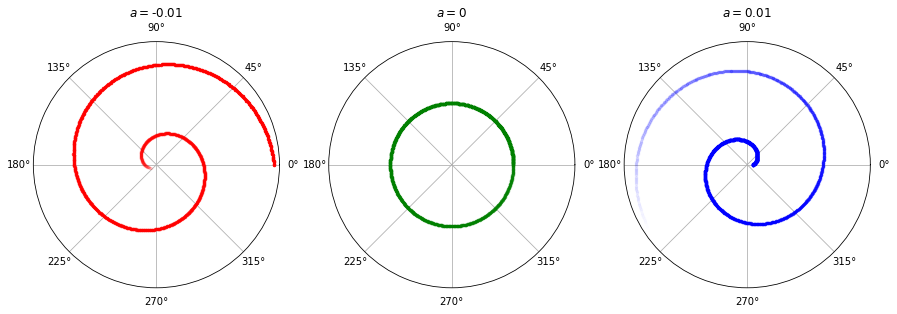

In [12]:
#Define the discrete time equations for radius and angle
def next_radius(r_0, a, dt):
    return r_0 + a * (r_0**3) * dt

def next_angle(theta_0, dt):
    return theta_0 + dt

#Format subplots in polar projection
fig, ax = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': 'polar'})

#Define a list of values of parameter a
a = [-0.01, 0, 0.01]

#Define a list of marker colours and types
c = ['r.', 'g.', 'b.']

#Graph three instances of the system
for n in range(len(a)):
    #Define initial parameter values
    r = 0.2
    theta = 0
    
    #Define time step
    dt = 0.01
    
    for t in np.arange(0, 10, dt):
        ax[n].plot(theta, r, c[n], ms = 5, alpha = (10-t)/10)
        
        #Calculate the next values
        r = next_radius(r, a[n], dt)
        theta = next_angle(theta, dt)
        
        #Stylise subplots
        ax[n].set_title(r'$a = $' + str(a[n]))
        ax[n].set_rticks([])
        
plt.show()

For $a < 0$, $r \to 0$ as $t \to \infty$ (stable spiral), whereas for $a > 0$, $r \to \infty$ (unstable spiral). Only for the exact value $a = 0$ is $r = r_0 \forall t$, so the origin is a centre, as suggested by the linearisation.

**Lesson**: Centres are delicate, i.e. they are easily altered by nonlinear terms.

Strogatz: "A phase portrait is *structurally stable* if its topology cannot be changed by an arbitrarily small perturbation to the vector field."

Note: Here the instability of the forward Euler method should also be taken into account.

### Rabbits versus Sheep (p. 156–160)

#### Lotka-Volterra Model of Competition

Let $x = $ population of rabbits and $y = $ population of sheep.

The governing equations are then:

$\dot x = x(3 - x - 2y)$

$\dot y = y(2 - x - y)$

This has the fixed points: $(0, 0), (3, 0), (0, 2)$ and $(1, 1)$.

The system has the Jacobian $A = \left(\begin{matrix}3-2x-2y&-2x\\-y&2-x-2y\end{matrix}\right)$ which we can use to classify the stability of the fixed points (see: textbook).

### Phase Portraits (p. 181)

**6.1.8**: van der Pol Oscillator

$\dot x = y$

$\dot y = -x + y(1 - x^2)$

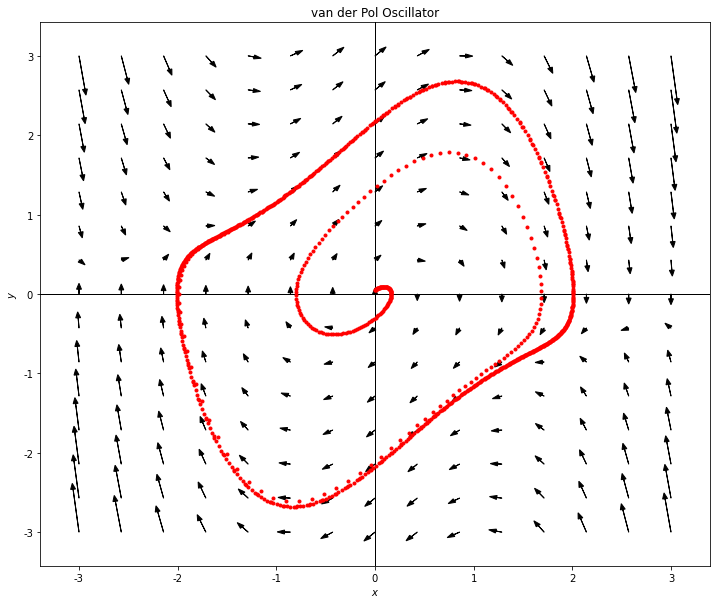

In [54]:
from slicc_tools import runge_kutta

#Define the governing equations of the van der Pol oscillator
def van_der_pol(vector):
    #Calculate the derivatives of x and y
    x_deriv = vector[1]
    y_deriv = - vector[0] + vector[1] * (1 - vector[0]**2)
    
    #Return the derivatives of x and y in vector form
    return np.array([x_deriv, y_deriv])


#Format figure for plotting
plt.figure(figsize=(12, 10))

plt.title('van der Pol Oscillator')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.xticks(range(-3, 4), range(-3, 4))
plt.yticks(range(-3, 4), range(-3, 4))

plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)

#Declare initial condition for plotting a single trajectory
x_0 = np.array([0, 0.05])

#Create loop for plotting a single trajectory of the system
for step in range(0, 1000):
    #Use plot instead of scatter for increased efficiency
    plt.plot(x_0[0], x_0[1], 'o', ms = 3, color = 'r', alpha = 1)
    
    #Retrieve the next value of the system using fourth-order Runge-Kutta
    x_0 = runge_kutta(x_0, van_der_pol, dt = 0.05)

#Create loop for plotting flow of the system on a phase plane / direction field
for x in get_real_grid(-3, 3, 15):
    #Plot arrows with length representing the derivative at a given point
    plt.arrow(x[0], x[1], 0.02*van_der_pol(x)[0], 0.02*van_der_pol(x)[1], \
              width = 0.001, head_width = 0.05, ec = 'k', fc = 'k', alpha = 1)

**6.1.9**: Dipole fixed point

$\dot x = 2xy$

$\dot y = y^2 - x^2$

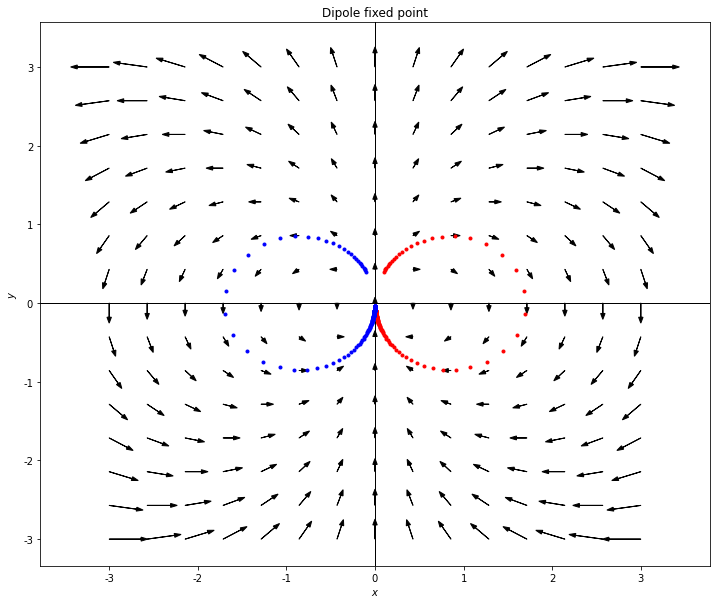

In [75]:
#Define the governing equation of the system
def dipole(vector):
    #Calculate the derivatives of x and y
    x_deriv = 2 * vector[0] * vector[1]
    y_deriv = vector[1]**2 - vector[0]**2
    
    #Return the derivatives of x and y in vector form
    return np.array([x_deriv, y_deriv])

#Format figure for plotting
plt.figure(figsize=(12, 10))

plt.title('Dipole fixed point')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.xticks(range(-3, 4), range(-3, 4))
plt.yticks(range(-3, 4), range(-3, 4))

plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)

#Declare initial conditions for plotting single trajectories
x_0 = np.array([0.1, 0.4])
x_1 = np.array([-0.1, 0.4])

#Create loop for plotting a single trajectory of the system from x_0
for step in range(0, 300):
    #Use plot instead of scatter for increased efficiency
    plt.plot(x_0[0], x_0[1], 'o', ms = 3, color = 'r', alpha = 1)
    
    #Retrieve the next value of the system using fourth-order Runge-Kutta
    x_0 = runge_kutta(x_0, dipole, dt = 0.1)

#Create loop for plotting a single trajectory of the system from x_1
for step in range(0, 300):
    #Use plot instead of scatter for increased efficiency
    plt.plot(x_1[0], x_1[1], 'o', ms = 3, color = 'b', alpha = 1)
    
    #Retrieve the next value of the system using fourth-order Runge-Kutta
    x_1 = runge_kutta(x_1, dipole, dt = 0.1)

#Create loop for plotting the direction field
for x in get_real_grid(-3, 3, 15):
    #Plot arrows with length representing the derivative at a given point
    plt.arrow(x[0], x[1], 0.02*dipole(x)[0], 0.02*dipole(x)[1], \
              width = 0.001, head_width = 0.05, ec = 'k', fc = 'k', alpha = 1)

**6.1.10**: Two-eyed monster

$\dot x = y + y^2$

$\dot y = - \frac{1}{2}x + \frac{1}{5}y - xy + \frac{6}{5}y^2$

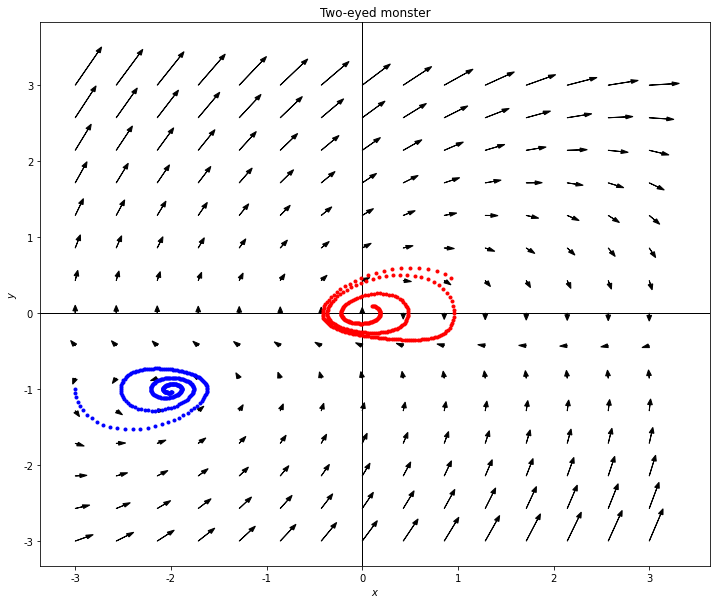

In [93]:
#Define the governing equation of the system
def monster(vector):
    #Calculate the derivatives of x and y
    x_deriv = vector[1] + vector[1]**2
    y_deriv = -1/2 * vector[0] + 1/5 * vector[1] - vector[0]*vector[1] + 6/5 * vector[1]**2
    
    #Return the derivatives of x and y in vector form
    return np.array([x_deriv, y_deriv])

#Format figure for plotting
plt.figure(figsize=(12, 10))

plt.title('Two-eyed monster')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.xticks(range(-3, 4), range(-3, 4))
plt.yticks(range(-3, 4), range(-3, 4))

plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)

#Declare initial conditions for plotting single trajectories
x_0 = np.array([0.1, 0.1])
x_1 = np.array([-3, -1])

#Create loop for plotting a single trajectory of the system from x_0
for step in range(0, 300):
    #Use plot instead of scatter for increased efficiency
    plt.plot(x_0[0], x_0[1], 'o', ms = 3, color = 'r', alpha = 1)
    
    #Retrieve the next value of the system using fourth-order Runge-Kutta
    x_0 = runge_kutta(x_0, monster, dt = 0.1)

#Create loop for plotting a single trajectory of the system from x_1
for step in range(0, 300):
    #Use plot instead of scatter for increased efficiency
    plt.plot(x_1[0], x_1[1], 'o', ms = 3, color = 'b', alpha = 1)
    
    #Retrieve the next value of the system using fourth-order Runge-Kutta
    x_1 = runge_kutta(x_1, monster, dt = 0.1)

#Create loop for plotting the direction field
for x in get_real_grid(-3, 3, 15):
    #Plot arrows with length representing the derivative at a given point
    plt.arrow(x[0], x[1], 0.02*monster(x)[0], 0.02*monster(x)[1], \
              width = 0.001, head_width = 0.05, ec = 'k', fc = 'k', alpha = 1)

**6.1.11**: Parrot

$\dot x = y + y^2$

$\dot y = - x + \frac{1}{5}y - xy + \frac{6}{5}y^2$

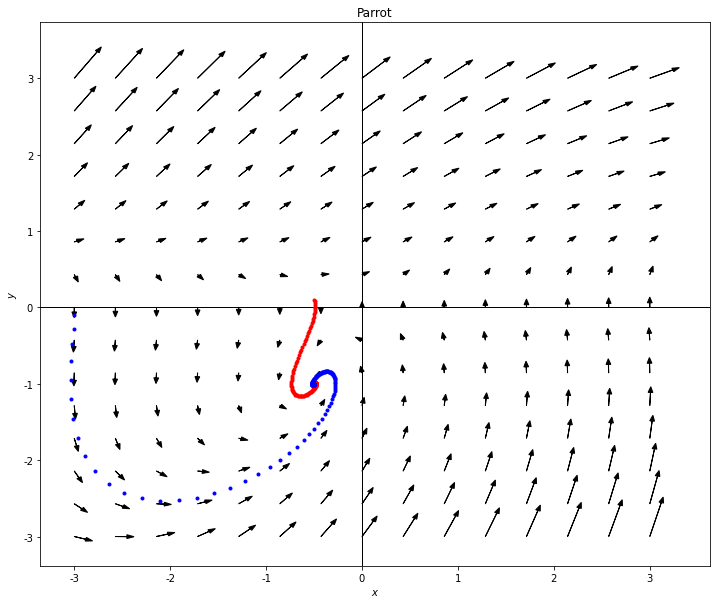

In [100]:
#Define the governing equation of the system
def parrot(vector):
    #Calculate the derivatives of x and y
    x_deriv = vector[1] + vector[1]**2
    y_deriv = vector[0] + 1/5 * vector[1] - vector[0]*vector[1] + 6/5 * vector[1]**2
    
    #Return the derivatives of x and y in vector form
    return np.array([x_deriv, y_deriv])

#Format figure for plotting
plt.figure(figsize=(12, 10))

plt.title('Parrot')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')

plt.xticks(range(-3, 4), range(-3, 4))
plt.yticks(range(-3, 4), range(-3, 4))

plt.axhline(y=0, color='k', linewidth=1)
plt.axvline(x=0, color='k', linewidth=1)

#Declare initial conditions for plotting single trajectories
x_0 = np.array([-0.5, 0.1])
x_1 = np.array([-3, -0.1])

#Create loop for plotting a single trajectory of the system from x_0
for step in range(0, 300):
    #Use plot instead of scatter for increased efficiency
    plt.plot(x_0[0], x_0[1], 'o', ms = 3, color = 'r', alpha = 1)
    
    #Retrieve the next value of the system using fourth-order Runge-Kutta
    x_0 = runge_kutta(x_0, parrot, dt = 0.05)

#Create loop for plotting a single trajectory of the system from x_1
for step in range(0, 300):
    #Use plot instead of scatter for increased efficiency
    plt.plot(x_1[0], x_1[1], 'o', ms = 3, color = 'b', alpha = 1)
    
    #Retrieve the next value of the system using fourth-order Runge-Kutta
    x_1 = runge_kutta(x_1, parrot, dt = 0.05)

#Create loop for plotting the direction field
for x in get_real_grid(-3, 3, 15):
    #Plot arrows with length representing the derivative at a given point
    plt.arrow(x[0], x[1], 0.02*parrot(x)[0], 0.02*parrot(x)[1], \
              width = 0.001, head_width = 0.05, ec = 'k', fc = 'k', alpha = 1)

The code can be significantly shortened by defining the functions plot_direction_field and plot_trajectory in the module slicc_tools.py.

Next up: [Lecture 7 – Conservative Systems](https://www.youtube.com/watch?v=3s2lmZspEU8&list=PLbN57C5Zdl6j_qJA-pARJnKsmROzPnO9V&index=7)